<a href="https://colab.research.google.com/github/OrmosiaCui/Data-Visualization/blob/main/sustainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
data = pd.read_csv('/content/drive/MyDrive/dataset/DVSF2.csv')
data

,location,age,gender,decisions,meaningful,personal_identity,Feeling_good,knowledge,expensive,not_available,uncertainty,preference,intention,purchased
0,North America,22-39,Male,Mostly not true,Disagree,Disagree,Not important,Strongly disagree,Strongly agree,Neutral,Strongly agree,Not true,Not true,Maybe/Not sure
1,North America,22-39,Female,Mostly true,Neutral,Agree,Important,Disagree,Disagree,Disagree,Neutral,Mostly not true,Mostly not true,Maybe/Not sure
2,North America,52-70,Female,Mostly true,Neutral,Disagree,Slightly important,Neutral,Agree,Neutral,Neutral,Mostly true,Neutral,Maybe/Not sure
3,North America,22-39,Female,Mostly true,Strongly agree,Agree,Neutral,Strongly disagree,Neutral,Neutral,Neutral,Neutral,Neutral,Maybe/Not sure
4,North America,22-39,Female,Mostly not true,Strongly agree,Neutral,Very important,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Mostly true,Not true,Maybe/Not sure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873,North America,22-39,Female,Mostly true,Strongly agree,Agree,Neutral,Agree,Agree,Disagree,Strongly agree,Neutral,Mostly true,Yes
1874,North America,Under 22,Female,Mostly true,Strongly agree,Agree,Important,Disagree,Disagree,Agree,Strongly agree,Neutral,Neutral,Yes
1875,North America,22-39,Female,Neutral,Agree,Agree,Important,Neutral,Strongly agree,Neutral,Agree,Mostly true,Mostly not true,Maybe/Not sure
1876,North America,22-39,Female,TRUE,Agree,Strongly agree,Important,Strongly disagree,Agree,Agree,Agree,Mostly true,Neutral,Maybe/Not sure


In [43]:
data['decisions'].nunique()

5

In [44]:
count = data[(data['gender'] == 'Female') & (data['purchased'] == 'Yes')].shape[0]
print(count)


977


In [45]:
data["purchased"].unique()

array(['Maybe/Not sure', 'Yes', 'No'], dtype=object)

# demongraphic

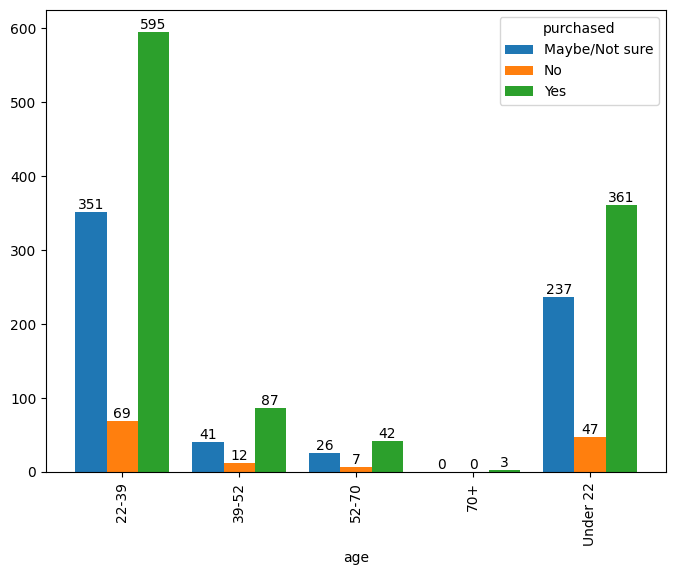

In [46]:

ax=data.groupby(['age', 'purchased']).size().unstack().plot(kind='bar',figsize=(8, 6),width=0.8)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

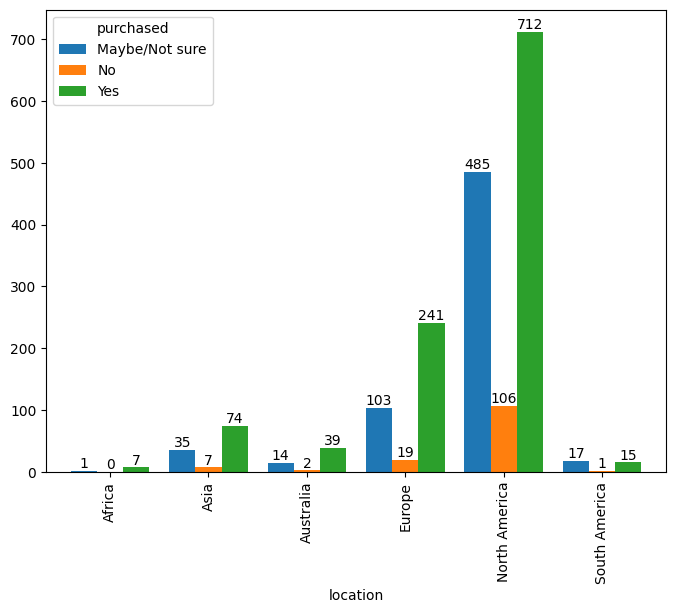

In [47]:
ax=data.groupby(['location', 'purchased']).size().unstack().plot(kind='bar',figsize=(8, 6),width=0.8)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

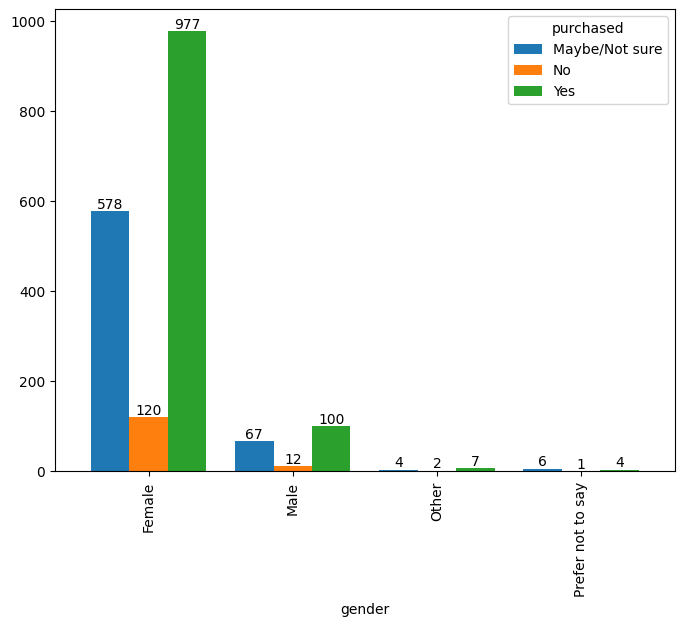

In [48]:
ax=data.groupby(['gender', 'purchased']).size().unstack().plot(kind='bar',figsize=(8, 6),width=0.8)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

level of uncertainty Agree                0.436635
Strongly agree       0.280085
Neutral              0.174121
Disagree             0.096379
Strongly disagree    0.012780
Name: uncertainty, dtype: float64


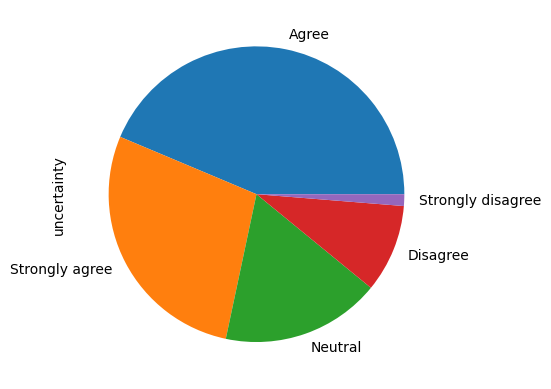

In [49]:
print('level of uncertainty',data.uncertainty.value_counts(normalize=True))
data.uncertainty.value_counts(normalize=True).plot.pie()
plt.show()

# available and location


In [50]:
import pandas as pd
import seaborn as sns
print(data.columns)
print(data['decisions'].unique())
print(data['meaningful'].unique())
print(data['personal_identity'].unique())
print(data['Feeling_good'].unique())
print(data['knowledge'].unique())
print(data['expensive'].unique())
print(data[' not_available'].unique())
print(data['uncertainty'].unique())
print(data['preference'].unique())
print(data['intention'].unique())
print(data['purchased'].unique())

Index(['location', 'age', 'gender', 'decisions', 'meaningful',
       'personal_identity', 'Feeling_good', 'knowledge', 'expensive',
       ' not_available', 'uncertainty', 'preference', 'intention',
       'purchased'],
      dtype='object')
['Mostly not true' 'Mostly true' 'Neutral' 'TRUE' 'Not true']
['Disagree' 'Neutral' 'Strongly agree' 'Agree' 'Strongly disagree']
['Disagree' 'Agree' 'Neutral' 'Strongly agree' 'Strongly disagree']
['Not important' 'Important' 'Slightly important' 'Neutral'
 'Very important']
['Strongly disagree' 'Disagree' 'Neutral' 'Strongly agree' 'Agree']
['Strongly agree' 'Disagree' 'Agree' 'Neutral' 'Strongly disagree' ' ']
['Neutral' 'Disagree' 'Strongly agree' 'Agree' 'Strongly disagree']
['Strongly agree' 'Neutral' 'Strongly disagree' 'Agree' 'Disagree']
['Not true' 'Mostly not true' 'Mostly true' 'Neutral' 'TRUE']
['Not true' 'Mostly not true' 'Neutral' 'TRUE' 'Mostly true']
['Maybe/Not sure' 'Yes' 'No']


In [51]:

data.replace({'Mostly not true':1, 'Mostly true':3, 'Neutral':2, 'TRUE':4, 'Not true':0}, inplace=True)

data.replace({'Disagree':1, 'Neutral':2, 'Strongly agree':4, 'Agree':3, 'Strongly disagree':0}, inplace=True)

data.replace({'Not important':0, 'Important':3, 'Slightly important':1, 'Neutral':2, 'Very important':4}, inplace=True)

In [52]:
data.replace({'Maybe/Not sure':1 ,'Yes':2 ,'No':0}, inplace=True)

In [53]:
data

,location,age,gender,decisions,meaningful,personal_identity,Feeling_good,knowledge,expensive,not_available,uncertainty,preference,intention,purchased
0,North America,22-39,Male,1,1,1,0,0,4,2,4,0,0,1
1,North America,22-39,Female,3,2,3,3,1,1,1,2,1,1,1
2,North America,52-70,Female,3,2,1,1,2,3,2,2,3,2,1
3,North America,22-39,Female,3,4,3,2,0,2,2,2,2,2,1
4,North America,22-39,Female,1,4,2,4,0,4,4,4,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873,North America,22-39,Female,3,4,3,2,3,3,1,4,2,3,2
1874,North America,Under 22,Female,3,4,3,3,1,1,3,4,2,2,2
1875,North America,22-39,Female,2,3,3,3,2,4,2,3,3,1,1
1876,North America,22-39,Female,4,3,4,3,0,3,3,3,3,2,1


In [54]:
data.columns

Index(['location', 'age', 'gender', 'decisions', 'meaningful',
       'personal_identity', 'Feeling_good', 'knowledge', 'expensive',
       ' not_available', 'uncertainty', 'preference', 'intention',
       'purchased'],
      dtype='object')

In [55]:
data2=data.drop(data.columns[[0, 1, 2]], axis=1)
data2

,decisions,meaningful,personal_identity,Feeling_good,knowledge,expensive,not_available,uncertainty,preference,intention,purchased
0,1,1,1,0,0,4,2,4,0,0,1
1,3,2,3,3,1,1,1,2,1,1,1
2,3,2,1,1,2,3,2,2,3,2,1
3,3,4,3,2,0,2,2,2,2,2,1
4,1,4,2,4,0,4,4,4,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1873,3,4,3,2,3,3,1,4,2,3,2
1874,3,4,3,3,1,1,3,4,2,2,2
1875,2,3,3,3,2,4,2,3,3,1,1
1876,4,3,4,3,0,3,3,3,3,2,1


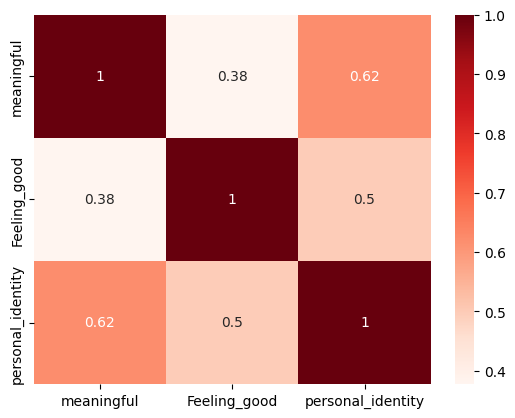

In [56]:
data[['meaningful','Feeling_good','personal_identity']].corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(data[['meaningful','Feeling_good','personal_identity']].corr(), annot=True, cmap = 'Reds')
plt.show()

<ipython-input-57-291943338faf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.corr(), annot=True, cmap = 'cool')


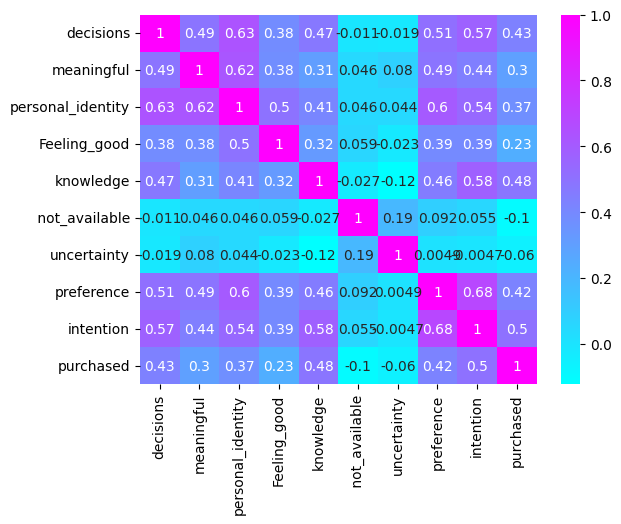

In [57]:
sns.heatmap(data2.corr(), annot=True, cmap = 'cool')
plt.show()

intention          0         1         2         3         4
preference                                                  
0           0.341463  1.200000  1.000000  1.666667  4.000000
1           0.593750  0.824561  1.000000  1.750000  3.333333
2           0.545455  1.144000  1.400000  2.245283  2.538462
3           0.653846  1.172043  1.660194  2.072917  2.400000
4           1.000000  1.687500  1.677419  2.191257  2.660661


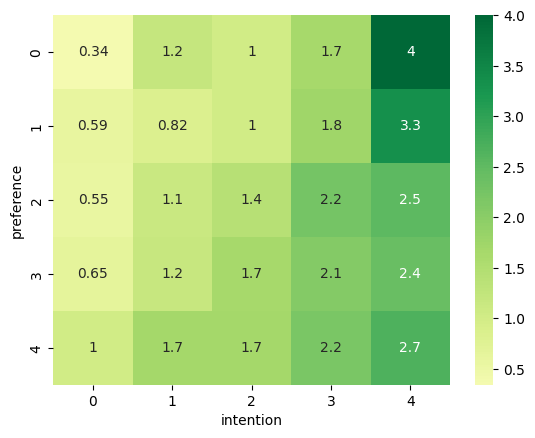

In [58]:
result = pd.pivot_table(data=data2, index='preference', columns='intention',values='knowledge')
print(result)

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

In [59]:
data2

,decisions,meaningful,personal_identity,Feeling_good,knowledge,expensive,not_available,uncertainty,preference,intention,purchased
0,1,1,1,0,0,4,2,4,0,0,1
1,3,2,3,3,1,1,1,2,1,1,1
2,3,2,1,1,2,3,2,2,3,2,1
3,3,4,3,2,0,2,2,2,2,2,1
4,1,4,2,4,0,4,4,4,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1873,3,4,3,2,3,3,1,4,2,3,2
1874,3,4,3,3,1,1,3,4,2,2,2
1875,2,3,3,3,2,4,2,3,3,1,1
1876,4,3,4,3,0,3,3,3,3,2,1


In [60]:
# data.to_csv('DVproj1.csv')

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# # This only needs to be done once in a notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
# # Create & upload a text file.
# uploaded = drive.CreateFile({'title': 'DVSF.csv'})

# uploaded.SetContentFile('DVproj1.csv')
# uploaded.Upload()
# print('Uploaded file with ID {}'.format(uploaded.get('id')))

# modeling part


In [61]:
data2

,decisions,meaningful,personal_identity,Feeling_good,knowledge,expensive,not_available,uncertainty,preference,intention,purchased
0,1,1,1,0,0,4,2,4,0,0,1
1,3,2,3,3,1,1,1,2,1,1,1
2,3,2,1,1,2,3,2,2,3,2,1
3,3,4,3,2,0,2,2,2,2,2,1
4,1,4,2,4,0,4,4,4,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1873,3,4,3,2,3,3,1,4,2,3,2
1874,3,4,3,3,1,1,3,4,2,2,2
1875,2,3,3,3,2,4,2,3,3,1,1
1876,4,3,4,3,0,3,3,3,3,2,1


In [62]:
data2 = data2.dropna(axis=1, how='any')

In [63]:
data2

,decisions,meaningful,personal_identity,Feeling_good,knowledge,expensive,not_available,uncertainty,preference,intention,purchased
0,1,1,1,0,0,4,2,4,0,0,1
1,3,2,3,3,1,1,1,2,1,1,1
2,3,2,1,1,2,3,2,2,3,2,1
3,3,4,3,2,0,2,2,2,2,2,1
4,1,4,2,4,0,4,4,4,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1873,3,4,3,2,3,3,1,4,2,3,2
1874,3,4,3,3,1,1,3,4,2,2,2
1875,2,3,3,3,2,4,2,3,3,1,1
1876,4,3,4,3,0,3,3,3,3,2,1


In [64]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [65]:
data2=data2.drop(columns=['expensive'])

In [66]:

# y_train=data2['intention']
X_train,X_test, y_train, y_test = sklearn.model_selection.train_test_split(data2,data2['intention'],test_size=0.2, random_state=0)

In [67]:
X_test.dtypes

decisions            int64
meaningful           int64
personal_identity    int64
Feeling_good         int64
knowledge            int64
 not_available       int64
uncertainty          int64
preference           int64
intention            int64
purchased            int64
dtype: object

# linear_model

In [68]:
from sklearn.linear_model import RidgeClassifier

RC = RidgeClassifier(tol=1e-2, solver="sparse_cg")
RC.fit(X_train, y_train)
pred1 = RC.predict(X_test)
pred1

array([4, 4, 1, 4, 2, 4, 4, 4, 4, 4, 2, 4, 3, 2, 4, 3, 1, 4, 3, 4, 3, 0,
       2, 4, 1, 4, 4, 2, 4, 3, 1, 1, 4, 3, 0, 3, 3, 4, 4, 3, 3, 1, 3, 4,
       3, 4, 3, 1, 4, 4, 2, 4, 0, 4, 4, 4, 4, 4, 1, 4, 3, 0, 4, 4, 2, 4,
       1, 4, 3, 4, 0, 1, 4, 4, 0, 4, 4, 3, 3, 3, 2, 3, 2, 4, 4, 2, 3, 2,
       4, 4, 4, 4, 4, 2, 3, 4, 3, 3, 2, 1, 2, 0, 4, 3, 1, 1, 4, 4, 1, 3,
       4, 4, 4, 1, 4, 1, 3, 0, 4, 4, 0, 2, 3, 4, 4, 4, 4, 3, 4, 0, 1, 3,
       3, 4, 4, 4, 3, 4, 0, 4, 4, 1, 3, 3, 3, 4, 2, 3, 4, 4, 2, 4, 0, 2,
       0, 2, 4, 4, 0, 3, 4, 4, 0, 3, 4, 1, 1, 3, 4, 3, 3, 4, 4, 0, 1, 3,
       4, 0, 1, 1, 3, 0, 0, 4, 3, 1, 4, 2, 4, 2, 1, 4, 2, 4, 0, 3, 1, 3,
       4, 4, 4, 0, 4, 1, 2, 0, 4, 3, 3, 2, 0, 1, 4, 3, 4, 2, 1, 3, 3, 4,
       4, 4, 2, 0, 3, 1, 4, 4, 4, 1, 4, 4, 3, 1, 0, 1, 3, 4, 4, 3, 1, 1,
       4, 1, 4, 4, 3, 3, 4, 4, 4, 2, 0, 2, 4, 4, 3, 3, 4, 1, 4, 3, 3, 4,
       1, 4, 4, 1, 4, 0, 3, 4, 4, 4, 3, 0, 1, 4, 4, 4, 4, 4, 2, 1, 4, 3,
       3, 4, 2, 2, 2, 4, 4, 2, 3, 4, 1, 3, 0, 1, 3,

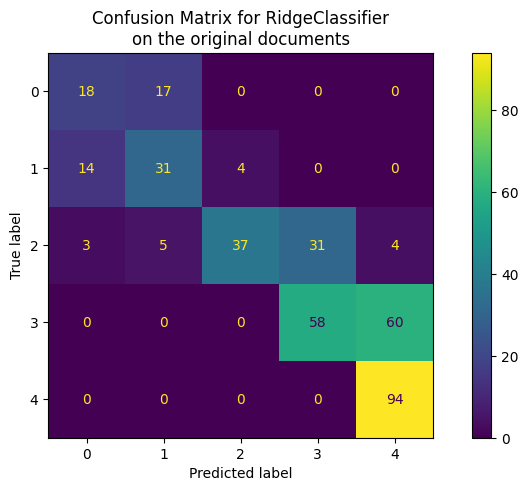

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred1, ax=ax)
_ = ax.set_title(
    f"Confusion Matrix for {RC.__class__.__name__}\non the original documents"
)

In [70]:
from sklearn.metrics import confusion_matrix,  accuracy_score, recall_score

In [71]:
cm1 = confusion_matrix(y_test, pred1)
print('Confusion matrix1:\n', cm1)

accuracy1 = accuracy_score(y_test, pred1)
print('Accuracy1:', accuracy1)

recall1 = recall_score(y_test, pred1,average=None)
print('Recall1:', recall1)

Confusion matrix1:
 [[18 17  0  0  0]
 [14 31  4  0  0]
 [ 3  5 37 31  4]
 [ 0  0  0 58 60]
 [ 0  0  0  0 94]]
Accuracy1: 0.6329787234042553
Recall1: [0.51428571 0.63265306 0.4625     0.49152542 1.        ]


# logistic regression


In [72]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay


In [73]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
pred2 = logreg.predict(X_test)
pred2

array([4, 4, 0, 4, 2, 4, 4, 3, 4, 4, 1, 4, 3, 2, 4, 3, 1, 4, 3, 4, 3, 0,
       2, 3, 0, 3, 4, 2, 4, 2, 1, 1, 4, 2, 0, 3, 2, 3, 3, 2, 2, 1, 3, 4,
       2, 4, 3, 1, 3, 2, 2, 3, 1, 3, 3, 2, 3, 3, 1, 3, 3, 1, 4, 3, 2, 4,
       0, 4, 2, 4, 0, 1, 3, 4, 0, 3, 3, 3, 3, 3, 2, 3, 2, 4, 3, 2, 3, 2,
       4, 3, 4, 3, 3, 2, 3, 4, 2, 2, 2, 1, 2, 1, 4, 3, 1, 1, 3, 4, 0, 3,
       3, 4, 3, 1, 4, 0, 3, 2, 4, 4, 0, 2, 3, 3, 3, 3, 3, 3, 4, 0, 1, 2,
       3, 4, 4, 4, 2, 3, 1, 3, 4, 0, 2, 3, 2, 3, 2, 2, 3, 3, 2, 4, 2, 1,
       0, 2, 4, 4, 1, 3, 4, 4, 0, 2, 4, 1, 1, 3, 3, 2, 2, 3, 3, 1, 1, 3,
       3, 0, 2, 1, 2, 0, 0, 3, 3, 2, 3, 2, 4, 2, 1, 3, 1, 4, 0, 2, 0, 3,
       4, 3, 4, 1, 4, 0, 2, 0, 2, 3, 3, 2, 1, 1, 3, 3, 4, 2, 2, 3, 3, 4,
       4, 3, 2, 1, 3, 2, 3, 4, 2, 0, 4, 3, 3, 0, 1, 1, 3, 4, 4, 3, 1, 1,
       4, 1, 4, 3, 3, 3, 4, 4, 3, 2, 0, 2, 4, 3, 3, 3, 4, 0, 4, 3, 3, 4,
       0, 4, 4, 0, 3, 1, 2, 4, 4, 4, 3, 1, 1, 4, 4, 4, 4, 4, 2, 2, 4, 3,
       3, 3, 2, 2, 2, 3, 4, 2, 3, 4, 1, 2, 1, 1, 3,

In [75]:
cm2 = confusion_matrix(y_test, pred2)
print('Confusion matrix2:\n', cm2)

accuracy2 = accuracy_score(y_test, pred2)
print('Accuracy2:', accuracy2)

recall2 = recall_score(y_test, pred2,average=None)
print('Recall2:', recall2)

Confusion matrix2:
 [[ 33   2   0   0   0]
 [  0  48   1   0   0]
 [  0   0  80   0   0]
 [  0   0   0 118   0]
 [  0   0   0   0  94]]
Accuracy2: 0.9920212765957447
Recall2: [0.94285714 0.97959184 1.         1.         1.        ]


# Naive Bayes

In [76]:
from sklearn.naive_bayes import CategoricalNB
NB = CategoricalNB(force_alpha=True)
NB.fit(X_train, y_train)
CategoricalNB(force_alpha=True)


CategoricalNB(force_alpha=True)

In [77]:
pred3=NB.predict(X_test)
pred3

array([4, 4, 0, 4, 2, 4, 4, 3, 4, 4, 1, 4, 3, 2, 4, 3, 1, 4, 3, 4, 3, 0,
       4, 3, 2, 3, 4, 2, 4, 2, 1, 1, 4, 2, 0, 3, 2, 3, 3, 2, 2, 1, 3, 4,
       2, 4, 3, 1, 3, 2, 2, 3, 1, 3, 3, 2, 3, 3, 1, 3, 3, 0, 1, 3, 2, 4,
       0, 4, 2, 4, 0, 1, 3, 4, 0, 3, 3, 3, 3, 3, 2, 3, 2, 4, 3, 2, 3, 1,
       4, 3, 4, 3, 3, 2, 3, 4, 2, 2, 2, 1, 2, 1, 4, 3, 1, 1, 3, 4, 0, 3,
       3, 4, 3, 4, 4, 0, 3, 2, 4, 4, 0, 2, 3, 3, 3, 3, 3, 3, 4, 0, 1, 2,
       3, 4, 4, 4, 2, 3, 1, 3, 4, 0, 2, 3, 2, 3, 2, 2, 3, 3, 2, 4, 2, 1,
       0, 2, 4, 4, 1, 3, 4, 4, 0, 2, 4, 1, 1, 3, 3, 2, 2, 3, 3, 1, 1, 3,
       3, 0, 2, 1, 2, 0, 0, 3, 3, 2, 3, 2, 4, 2, 1, 3, 1, 4, 0, 2, 0, 3,
       4, 3, 4, 1, 4, 0, 4, 0, 2, 3, 3, 2, 1, 1, 3, 3, 4, 2, 2, 3, 3, 4,
       4, 3, 2, 1, 3, 2, 3, 4, 2, 0, 4, 3, 3, 0, 1, 1, 3, 4, 4, 3, 1, 1,
       4, 1, 4, 3, 3, 3, 4, 4, 3, 2, 0, 2, 4, 3, 3, 3, 4, 0, 4, 3, 3, 4,
       0, 4, 4, 0, 3, 0, 2, 4, 4, 4, 3, 1, 1, 4, 4, 4, 4, 4, 2, 2, 4, 3,
       3, 0, 2, 2, 2, 3, 4, 2, 3, 4, 1, 2, 1, 1, 3,

In [78]:
cm3 = confusion_matrix(y_test, pred3)
print('Confusion matrix3:\n', cm3)

accuracy3 = accuracy_score(y_test, pred3)
print('Accuracy3:', accuracy3)

recall3 = recall_score(y_test, pred3,average=None)
print('Recall3:', recall3)

Confusion matrix3:
 [[ 34   0   1   0   0]
 [  0  48   0   0   1]
 [  0   0  78   0   2]
 [  1   0   0 117   0]
 [  0   1   0   0  93]]
Accuracy3: 0.9840425531914894
Recall3: [0.97142857 0.97959184 0.975      0.99152542 0.9893617 ]


# Decision Tree

In [79]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT= DT.fit(X_train, y_train)

In [80]:
X_train

,decisions,meaningful,personal_identity,Feeling_good,knowledge,not_available,uncertainty,preference,intention,purchased
89,3,3,3,3,0,3,3,2,1,1
1754,0,4,3,3,1,3,3,3,3,1
667,3,3,3,3,3,4,4,4,2,2
1366,4,4,4,2,1,2,3,3,2,2
1368,4,4,4,4,3,3,4,3,2,2
...,...,...,...,...,...,...,...,...,...,...
835,4,4,4,3,2,2,3,3,3,2
1216,2,3,3,3,1,1,4,1,1,1
1653,4,4,4,3,1,4,4,4,4,1
559,3,4,4,3,1,1,3,2,1,1


In [81]:
pred4=DT.predict(X_test)
a=pred4-y_test
a

995     0
124     0
217     0
1424    0
1223    0
       ..
817     0
506     0
988     0
1625    0
1051    0
Name: intention, Length: 376, dtype: int64

[Text(0.7142857142857143, 0.9, 'x[8] <= 3.5\ngini = 0.784\nsamples = 1502\nvalue = [168, 247, 343, 413, 331]'),
 Text(0.5714285714285714, 0.7, 'x[8] <= 2.5\ngini = 0.725\nsamples = 1171\nvalue = [168, 247, 343, 413, 0]'),
 Text(0.42857142857142855, 0.5, 'x[8] <= 1.5\ngini = 0.64\nsamples = 758\nvalue = [168, 247, 343, 0, 0]'),
 Text(0.2857142857142857, 0.3, 'x[8] <= 0.5\ngini = 0.482\nsamples = 415\nvalue = [168, 247, 0, 0, 0]'),
 Text(0.14285714285714285, 0.1, 'gini = 0.0\nsamples = 168\nvalue = [168, 0, 0, 0, 0]'),
 Text(0.42857142857142855, 0.1, 'gini = 0.0\nsamples = 247\nvalue = [0, 247, 0, 0, 0]'),
 Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 343\nvalue = [0, 0, 343, 0, 0]'),
 Text(0.7142857142857143, 0.5, 'gini = 0.0\nsamples = 413\nvalue = [0, 0, 0, 413, 0]'),
 Text(0.8571428571428571, 0.7, 'gini = 0.0\nsamples = 331\nvalue = [0, 0, 0, 0, 331]')]

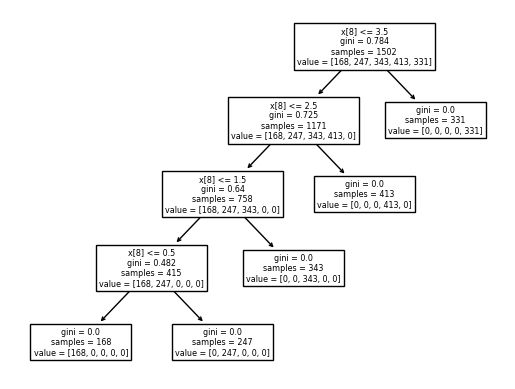

In [82]:
tree.plot_tree(DT)

In [83]:
cm4 = confusion_matrix(y_test, pred4)
print('Confusion matrix4:\n', cm4)

accuracy4 = accuracy_score(y_test, pred4)
print('Accuracy4:', accuracy4)

recall4 = recall_score(y_test, pred4,average=None)
print('Recall3:', recall4)

Confusion matrix4:
 [[ 35   0   0   0   0]
 [  0  49   0   0   0]
 [  0   0  80   0   0]
 [  0   0   0 118   0]
 [  0   0   0   0  94]]
Accuracy4: 1.0
Recall3: [1. 1. 1. 1. 1.]


#RandomForest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
RF= RandomForestClassifier(max_depth=2, random_state=0)
RF.fit(X_train, y_train)
pred6=RF.predict(X_test)
pred6

array([4, 4, 0, 4, 2, 4, 4, 3, 4, 4, 1, 4, 3, 2, 4, 3, 1, 4, 3, 4, 3, 0,
       4, 3, 2, 3, 4, 2, 4, 2, 2, 2, 4, 2, 0, 3, 2, 3, 3, 2, 2, 2, 3, 4,
       2, 4, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 0, 4, 3, 2, 4,
       1, 4, 2, 4, 0, 2, 3, 4, 0, 3, 3, 3, 3, 3, 2, 3, 2, 4, 3, 2, 3, 2,
       4, 3, 4, 3, 3, 2, 3, 4, 2, 2, 2, 2, 2, 1, 4, 3, 2, 1, 3, 4, 0, 3,
       3, 4, 3, 2, 4, 1, 3, 2, 4, 4, 0, 2, 3, 3, 3, 3, 3, 3, 4, 0, 2, 2,
       3, 4, 4, 4, 2, 3, 1, 3, 4, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 4, 2, 2,
       2, 2, 4, 4, 1, 3, 4, 4, 0, 2, 4, 2, 2, 3, 3, 2, 2, 3, 3, 1, 2, 3,
       3, 0, 2, 2, 2, 0, 1, 3, 3, 2, 3, 2, 4, 2, 2, 3, 1, 4, 0, 2, 0, 3,
       4, 3, 4, 1, 4, 0, 4, 2, 4, 3, 3, 4, 2, 1, 3, 3, 4, 2, 2, 3, 3, 4,
       4, 3, 2, 1, 3, 2, 3, 4, 2, 2, 4, 3, 3, 2, 2, 2, 3, 4, 4, 3, 2, 2,
       4, 3, 4, 3, 3, 3, 4, 4, 3, 2, 0, 2, 4, 3, 3, 3, 4, 2, 4, 3, 3, 4,
       0, 4, 4, 2, 3, 0, 2, 4, 4, 4, 3, 1, 2, 4, 4, 4, 4, 4, 2, 2, 4, 3,
       3, 3, 2, 2, 2, 3, 4, 2, 3, 4, 2, 2, 1, 2, 3,

In [87]:
cm6 = confusion_matrix(y_test, pred6)
print('Confusion matrix6:\n', cm6)

accuracy6 = accuracy_score(y_test, pred6)
print('Accuracy6:', accuracy6)

recall6 = recall_score(y_test, pred6,average=None)
print('Recall6:', recall6)

Confusion matrix6:
 [[ 22   4   9   0   0]
 [  1  19  28   1   0]
 [  0   0  73   3   4]
 [  0   0   0 118   0]
 [  0   0   0   0  94]]
Accuracy6: 0.8670212765957447
Recall6: [0.62857143 0.3877551  0.9125     1.         1.        ]


# Gredient boosting


In [88]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
GB.score(X_test, y_test)

1.0

In [90]:
pred5=GB.predict(X_test)
b=pred5-pred4
b

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [91]:
cm5 = confusion_matrix(y_test, pred5)
print('Confusion matrix5:\n', cm5)

accuracy5 = accuracy_score(y_test, pred5)
print('Accuracy5:', accuracy5)

recall5 = recall_score(y_test, pred5,average=None)
print('Recall5:', recall5)

Confusion matrix5:
 [[ 35   0   0   0   0]
 [  0  49   0   0   0]
 [  0   0  80   0   0]
 [  0   0   0 118   0]
 [  0   0   0   0  94]]
Accuracy5: 1.0
Recall5: [1. 1. 1. 1. 1.]


# Neural Network

In [92]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
MLP.fit(X_train, y_train)
pred7=MLP.predict(X_test)

In [93]:
pred7

array([4, 4, 0, 4, 2, 4, 4, 3, 4, 4, 1, 4, 3, 2, 4, 3, 1, 4, 3, 4, 3, 0,
       2, 3, 0, 3, 4, 2, 4, 2, 1, 1, 4, 2, 0, 3, 2, 3, 3, 2, 2, 1, 3, 4,
       2, 4, 3, 1, 3, 2, 2, 3, 1, 3, 3, 2, 3, 3, 1, 3, 3, 0, 4, 3, 2, 4,
       0, 4, 2, 4, 0, 1, 3, 4, 0, 3, 3, 3, 3, 3, 2, 3, 2, 4, 3, 2, 3, 1,
       4, 3, 4, 3, 3, 2, 3, 4, 2, 2, 2, 1, 2, 1, 4, 3, 1, 1, 3, 4, 0, 3,
       3, 4, 3, 1, 4, 0, 3, 2, 4, 4, 0, 2, 3, 3, 3, 3, 3, 3, 4, 0, 1, 2,
       3, 4, 4, 4, 2, 3, 1, 3, 4, 0, 2, 3, 2, 3, 2, 2, 3, 3, 2, 4, 2, 1,
       0, 2, 4, 4, 1, 3, 4, 4, 0, 2, 4, 1, 1, 3, 3, 2, 2, 3, 3, 1, 1, 3,
       3, 0, 2, 1, 2, 0, 0, 3, 3, 2, 3, 2, 4, 2, 1, 3, 1, 4, 0, 2, 0, 3,
       4, 3, 4, 1, 4, 0, 2, 0, 2, 3, 3, 2, 1, 1, 3, 3, 4, 2, 2, 3, 3, 4,
       4, 3, 2, 1, 3, 2, 3, 4, 2, 0, 4, 3, 3, 0, 1, 1, 3, 4, 4, 3, 1, 1,
       4, 1, 4, 3, 3, 3, 4, 4, 3, 2, 0, 2, 4, 3, 3, 3, 4, 0, 4, 3, 3, 4,
       0, 4, 4, 0, 3, 0, 2, 4, 4, 4, 3, 1, 1, 4, 4, 4, 4, 4, 2, 2, 4, 3,
       3, 3, 2, 2, 2, 3, 4, 2, 3, 4, 1, 2, 1, 1, 3,

In [94]:
cm7 = confusion_matrix(y_test, pred7)
print('Confusion matrix7:\n', cm7)

accuracy7 = accuracy_score(y_test, pred7)
print('Accuracy7:', accuracy7)

recall7 = recall_score(y_test, pred7,average=None)
print('Recall7:', recall7)

Confusion matrix7:
 [[ 35   0   0   0   0]
 [  0  49   0   0   0]
 [  0   0  80   0   0]
 [  0   0   0 118   0]
 [  0   0   0   0  94]]
Accuracy7: 1.0
Recall7: [1. 1. 1. 1. 1.]


#knn

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [96]:

pred8=knn.predict(X_test)
pred8_proba=knn.predict_proba(X_test)
pred8

array([3, 3, 0, 4, 3, 4, 4, 3, 4, 4, 1, 3, 3, 2, 4, 3, 1, 4, 3, 4, 3, 0,
       2, 3, 1, 3, 4, 2, 4, 2, 1, 2, 4, 2, 1, 3, 2, 2, 2, 2, 2, 1, 3, 4,
       2, 4, 3, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 4, 1, 3, 3, 0, 3, 2, 2, 4,
       0, 4, 2, 3, 0, 1, 3, 4, 0, 3, 3, 3, 4, 3, 2, 3, 2, 4, 3, 1, 3, 2,
       4, 3, 4, 3, 3, 2, 3, 4, 2, 3, 2, 1, 2, 1, 4, 3, 1, 1, 3, 4, 1, 3,
       3, 4, 3, 2, 4, 1, 3, 2, 4, 4, 0, 2, 3, 3, 3, 3, 3, 3, 4, 0, 1, 2,
       3, 4, 4, 4, 2, 3, 1, 3, 3, 1, 3, 3, 2, 3, 2, 2, 3, 3, 2, 4, 2, 2,
       0, 2, 4, 4, 1, 3, 4, 4, 0, 2, 4, 1, 1, 3, 3, 2, 2, 3, 3, 1, 1, 3,
       2, 0, 2, 1, 2, 0, 1, 3, 3, 2, 3, 2, 4, 3, 1, 3, 1, 4, 0, 2, 1, 3,
       4, 3, 3, 1, 4, 1, 3, 0, 2, 3, 3, 3, 1, 1, 3, 3, 4, 2, 2, 3, 4, 4,
       4, 3, 2, 1, 3, 1, 3, 4, 2, 1, 4, 3, 3, 1, 1, 1, 3, 4, 4, 3, 1, 2,
       4, 2, 4, 3, 3, 3, 4, 4, 3, 1, 0, 2, 4, 3, 4, 3, 4, 1, 4, 3, 3, 4,
       1, 4, 4, 1, 3, 0, 2, 4, 4, 4, 3, 1, 1, 3, 4, 4, 4, 4, 2, 1, 4, 3,
       3, 2, 2, 2, 2, 4, 4, 2, 3, 4, 2, 2, 1, 1, 4,

In [97]:
cm8 = confusion_matrix(y_test, pred8)
print('Confusion matrix8:\n', cm8)

accuracy8 = accuracy_score(y_test, pred8)
print('Accuracy8:', accuracy8)

recall8 = recall_score(y_test, pred8,average=None)
print('Recall8:', recall8)

Confusion matrix8:
 [[ 22  13   0   0   0]
 [  1  38  10   0   0]
 [  0   5  67   8   0]
 [  0   0   7 103   8]
 [  0   0   0  10  84]]
Accuracy8: 0.8351063829787234
Recall8: [0.62857143 0.7755102  0.8375     0.87288136 0.89361702]


In [98]:
pred8_proba

array([[0. , 0. , 0. , 0.8, 0.2],
       [0. , 0. , 0. , 0.6, 0.4],
       [0.8, 0.2, 0. , 0. , 0. ],
       ...,
       [0. , 0.2, 0.8, 0. , 0. ],
       [0. , 0. , 0.4, 0.4, 0.2],
       [0. , 0. , 0. , 0. , 1. ]])

#model comparison and selection


In [99]:
from sklearn.ensemble import VotingClassifier

In [100]:
eclf = VotingClassifier(
    estimators=[("linear_model", RC), ("lr", logreg), ("NB", NB),('DT',DT),('GB',GB),('RF',RF),('MLP',MLP)],
    voting="soft"
)

In [101]:
# predict class probabilities for all classifiers
probas = [c.fit(X_train, y_train).predict_proba(X_test) for c in ( logreg, NB, DT, GB,RF,MLP)]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
from sklearn.metrics import classification_report

In [103]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
y_pred=pred1
lr=classification_report(y_test, y_pred, target_names=target_names)
print(lr)

              precision    recall  f1-score   support

     class 0       0.51      0.51      0.51        35
     class 1       0.58      0.63      0.61        49
     class 2       0.90      0.46      0.61        80
     class 3       0.65      0.49      0.56       118
     class 4       0.59      1.00      0.75        94

    accuracy                           0.63       376
   macro avg       0.65      0.62      0.61       376
weighted avg       0.67      0.63      0.62       376



In [104]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
y_pred=pred2
logreg=classification_report(y_test, y_pred, target_names=target_names)
print(logreg)

              precision    recall  f1-score   support

     class 0       1.00      0.94      0.97        35
     class 1       0.96      0.98      0.97        49
     class 2       0.99      1.00      0.99        80
     class 3       1.00      1.00      1.00       118
     class 4       1.00      1.00      1.00        94

    accuracy                           0.99       376
   macro avg       0.99      0.98      0.99       376
weighted avg       0.99      0.99      0.99       376



In [105]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
y_pred=pred3
NB=classification_report(y_test, y_pred, target_names=target_names)
print(NB)

              precision    recall  f1-score   support

     class 0       0.97      0.97      0.97        35
     class 1       0.98      0.98      0.98        49
     class 2       0.99      0.97      0.98        80
     class 3       1.00      0.99      1.00       118
     class 4       0.97      0.99      0.98        94

    accuracy                           0.98       376
   macro avg       0.98      0.98      0.98       376
weighted avg       0.98      0.98      0.98       376



In [106]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
y_pred=pred4
DT=classification_report(y_test, y_pred, target_names=target_names)
print(DT)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        35
     class 1       1.00      1.00      1.00        49
     class 2       1.00      1.00      1.00        80
     class 3       1.00      1.00      1.00       118
     class 4       1.00      1.00      1.00        94

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376



In [107]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
y_pred=pred5
GB=classification_report(y_test, y_pred, target_names=target_names)
print(GB)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        35
     class 1       1.00      1.00      1.00        49
     class 2       1.00      1.00      1.00        80
     class 3       1.00      1.00      1.00       118
     class 4       1.00      1.00      1.00        94

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376



In [108]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
y_pred=pred6
RF=classification_report(y_test, y_pred, target_names=target_names)
print(RF)

              precision    recall  f1-score   support

     class 0       0.96      0.63      0.76        35
     class 1       0.83      0.39      0.53        49
     class 2       0.66      0.91      0.77        80
     class 3       0.97      1.00      0.98       118
     class 4       0.96      1.00      0.98        94

    accuracy                           0.87       376
   macro avg       0.87      0.79      0.80       376
weighted avg       0.88      0.87      0.86       376



In [109]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
y_pred=pred7
MLP=classification_report(y_test, y_pred, target_names=target_names)
print(MLP)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        35
     class 1       1.00      1.00      1.00        49
     class 2       1.00      1.00      1.00        80
     class 3       1.00      1.00      1.00       118
     class 4       1.00      1.00      1.00        94

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376



In [110]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
y_pred=pred8
KNN=classification_report(y_test, y_pred, target_names=target_names)
print(KNN)

              precision    recall  f1-score   support

     class 0       0.96      0.63      0.76        35
     class 1       0.68      0.78      0.72        49
     class 2       0.80      0.84      0.82        80
     class 3       0.85      0.87      0.86       118
     class 4       0.91      0.89      0.90        94

    accuracy                           0.84       376
   macro avg       0.84      0.80      0.81       376
weighted avg       0.84      0.84      0.84       376



# gain table/lift chart

In [111]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
# import matplotlib.pyplot as plt
# import scikitplot as skplt
# skplt.metrics.plot_cumulative_gain(y_test, pred1)
# plt.show()

In [113]:
!pip install kds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
import kds


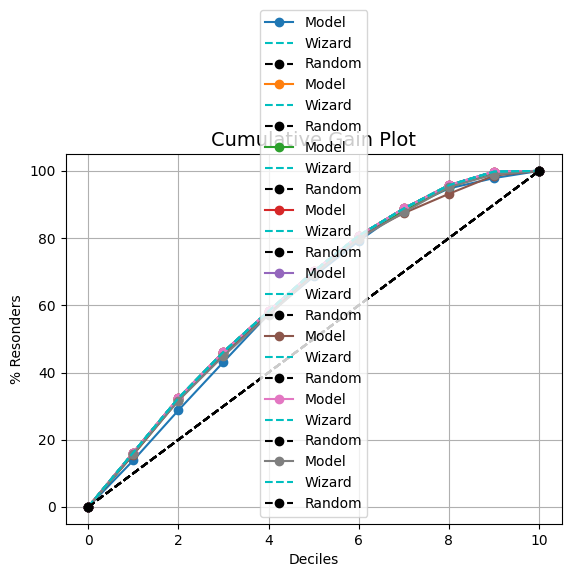

In [115]:
kds.metrics.plot_cumulative_gain(y_test, pred1)
kds.metrics.plot_cumulative_gain(y_test, pred2)
kds.metrics.plot_cumulative_gain(y_test, pred3)
kds.metrics.plot_cumulative_gain(y_test, pred4)
kds.metrics.plot_cumulative_gain(y_test, pred5)
kds.metrics.plot_cumulative_gain(y_test, pred6)
kds.metrics.plot_cumulative_gain(y_test, pred7)
kds.metrics.plot_cumulative_gain(y_test, pred8)
#LIFT PLOT


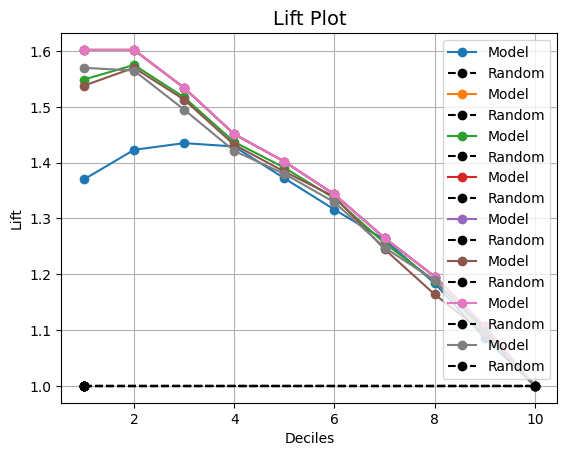

In [116]:
kds.metrics.plot_lift(y_test, pred1)
kds.metrics.plot_lift(y_test, pred2)
kds.metrics.plot_lift(y_test, pred3)
kds.metrics.plot_lift(y_test, pred4)
kds.metrics.plot_lift(y_test, pred5)
kds.metrics.plot_lift(y_test, pred6)
kds.metrics.plot_lift(y_test, pred7)
kds.metrics.plot_lift(y_test, pred8)

In [117]:
def decile_table(y_true, y_prob, change_deciles=10, labels=True, round_decimal=3):
    """Generates the Decile Table from labels and probabilities
    
    The Decile Table is creared by first sorting the customers by their predicted 
    probabilities, in decreasing order from highest (closest to one) to 
    lowest (closest to zero). Splitting the customers into equally sized segments, 
    we create groups containing the same numbers of customers, for example, 10 decile 
    groups each containing 10% of the customer base.
    
    Args:
        y_true (array-like, shape (n_samples)):
            Ground truth (correct/actual) target values.
        y_prob (array-like, shape (n_samples, n_classes)):
            Prediction probabilities for each class returned by a classifier/algorithm.
        change_deciles (int, optional): The number of partitions for creating the table
            can be changed. Defaults to '10' for deciles.
        labels (bool, optional): If True, prints a legend for the abbreviations of
            decile table column names. Defaults to True.
        round_decimal (int, optional): The decimal precision till which the result is 
            needed. Defaults to '3'.
    Returns:
        dt: The dataframe dt (decile-table) with the deciles and related information.
    Example:
        >>> import kds
        >>> from sklearn.datasets import load_iris
        >>> from sklearn.model_selection import train_test_split
        >>> from sklearn import tree
        >>> X, y = load_iris(return_X_y=True)
        >>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=3)
        >>> clf = tree.DecisionTreeClassifier(max_depth=1,random_state=3)
        >>> clf = clf.fit(X_train, y_train)
        >>> y_prob = clf.predict_proba(X_test)
        >>> kds.metrics.decile_table(y_test, y_prob[:,1])
    """
    y_true = np.array(y_true)
    y_prob = np.array(y_prob)

    df = pd.DataFrame()
    df['y_true'] = y_true
    df['y_prob'] = y_prob
    # df['decile']=pd.qcut(df['y_prob'], 10, labels=list(np.arange(10,0,-1))) 
    # ValueError: Bin edges must be unique

    df.sort_values('y_prob', ascending=False, inplace=True)
    df['decile'] = np.linspace(1, change_deciles+1, len(df), False, dtype=int)

    # dt abbreviation for decile_table
    dt = df.groupby('decile').apply(lambda x: pd.Series([
        np.min(x['y_prob']),
        np.max(x['y_prob']),
        np.mean(x['y_prob']),
        np.size(x['y_prob']),
        np.sum(x['y_true']),
        np.size(x['y_true'][x['y_true'] == 0]),
    ],
        index=(["prob_min", "prob_max", "prob_avg",
                "cnt_cust", "cnt_resp", "cnt_non_resp"])
    )).reset_index()

    dt['prob_min']=dt['prob_min'].round(round_decimal)
    dt['prob_max']=dt['prob_max'].round(round_decimal)
    dt['prob_avg']=round(dt['prob_avg'],round_decimal)
    # dt=dt.sort_values(by='decile',ascending=False).reset_index(drop=True)

    tmp = df[['y_true']].sort_values('y_true', ascending=False)
    tmp['decile'] = np.linspace(1, change_deciles+1, len(tmp), False, dtype=int)

    dt['cnt_resp_rndm'] = np.sum(df['y_true']) / change_deciles
    dt['cnt_resp_wiz'] = tmp.groupby('decile', as_index=False)['y_true'].sum()['y_true']

    dt['resp_rate'] = round(dt['cnt_resp'] * 100 / dt['cnt_cust'], round_decimal)
    dt['cum_cust'] = np.cumsum(dt['cnt_cust'])
    dt['cum_resp'] = np.cumsum(dt['cnt_resp'])
    dt['cum_resp_wiz'] = np.cumsum(dt['cnt_resp_wiz'])
    dt['cum_non_resp'] = np.cumsum(dt['cnt_non_resp'])
    dt['cum_cust_pct'] = round(dt['cum_cust'] * 100 / np.sum(dt['cnt_cust']), round_decimal)
    dt['cum_resp_pct'] = round(dt['cum_resp'] * 100 / np.sum(dt['cnt_resp']), round_decimal)
    dt['cum_resp_pct_wiz'] = round(dt['cum_resp_wiz'] * 100 / np.sum(dt['cnt_resp_wiz']), round_decimal)
    dt['cum_non_resp_pct'] = round(
        dt['cum_non_resp'] * 100 / np.sum(dt['cnt_non_resp']), round_decimal)
    dt['KS'] = round(dt['cum_resp_pct'] - dt['cum_non_resp_pct'], round_decimal)
    dt['lift'] = round(dt['cum_resp_pct'] / dt['cum_cust_pct'], round_decimal)

    if labels is True:
        print_labels()

    return dt

def myplot_lift_decile_wise(y_true, y_prob,label, title='Decile-wise Lift Plot', 
                          title_fontsize=14, text_fontsize=5, figsize=None):
    """Generates the Decile-wise Lift Plot from labels and probabilities
    The lift curve is used to determine the effectiveness of a
    binary classifier. A detailed explanation can be found at
    http://www2.cs.uregina.ca/~dbd/cs831/notes/lift_chart/lift_chart.html
    The implementation here works only for binary classification.
    
    Args:
        y_true (array-like, shape (n_samples)):
            Ground truth (correct) target values.
        y_prob (array-like, shape (n_samples, n_classes)):
            Prediction probabilities for each class returned by a classifier.
        title (string, optional): Title of the generated plot. Defaults to
            "Decile-wise Lift Plot".
        title_fontsize (string or int, optional): Matplotlib-style fontsizes.
            Use e.g. "small", "medium", "large" or integer-values (8, 10, 12, etc.)
            Defaults to 14.
        text_fontsize (string or int, optional): Matplotlib-style fontsizes.
            Use e.g. "small", "medium", "large" or integer-values (8, 10, 12, etc.)
            Defaults to 10.
        figsize (2-tuple, optional): Tuple denoting figure size of the plot
            e.g. (6, 6). Defaults to ``None``.
    Returns:
        None
    Example:
        >>> import kds
        >>> from sklearn.datasets import load_iris
        >>> from sklearn.model_selection import train_test_split
        >>> from sklearn import tree
        >>> X, y = load_iris(return_X_y=True)
        >>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=3)
        >>> clf = tree.DecisionTreeClassifier(max_depth=1,random_state=3)
        >>> clf = clf.fit(X_train, y_train)
        >>> y_prob = clf.predict_proba(X_test)
        >>> kds.metrics.plot_lift_decile_wise(y_test, y_prob[:,1])
    """
    # Decile-wise Lift Plot
    # plt.subplot(2, 2, 2)
    pldw = decile_table(y_true,y_prob,labels=False)
    plt.plot(pldw.decile.values, pldw.cnt_resp.values / pldw.cnt_resp_rndm.values, marker='o', label=label)
    # plt.plot(list(np.arange(1,11)), np.ones(10), 'k--',marker='o')
    plt.plot([1, 10], [1, 1], 'k--', marker='o', label='Random')
    plt.title(title, fontsize=title_fontsize)
    plt.xlabel('Deciles', fontsize=text_fontsize)
    plt.ylabel('Lift @ Decile', fontsize=text_fontsize)
    plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=0)
    plt.grid(True)
    # plt.show()

In [118]:
def myplot_lift(y_true, y_prob, label, title='Lift Plot', title_fontsize=14, 
              text_fontsize=1, figsize=None):
    """Generates the Decile based cumulative Lift Plot from labels and probabilities
    The lift curve is used to determine the effectiveness of a
    binary classifier. A detailed explanation can be found at
    http://www2.cs.uregina.ca/~dbd/cs831/notes/lift_chart/lift_chart.html
    The implementation here works only for binary classification.
    
    Args:
        y_true (array-like, shape (n_samples)):
            Ground truth (correct) target values.
        y_prob (array-like, shape (n_samples, n_classes)):
            Prediction probabilities for each class returned by a classifier.
        title (string, optional): Title of the generated plot. Defaults to
            "Lift Plot".
        title_fontsize (string or int, optional): Matplotlib-style fontsizes.
            Use e.g. "small", "medium", "large" or integer-values (8, 10, 12, etc.)
            Defaults to 14.
        text_fontsize (string or int, optional): Matplotlib-style fontsizes.
            Use e.g. "small", "medium", "large" or integer-values (8, 10, 12, etc.)
            Defaults to 10.        
        figsize (2-tuple, optional): Tuple denoting figure size of the plot
            e.g. (6, 6). Defaults to ``None``.
    Returns:
        None
    Example:
        >>> import kds
        >>> from sklearn.datasets import load_iris
        >>> from sklearn.model_selection import train_test_split
        >>> from sklearn import tree
        >>> X, y = load_iris(return_X_y=True)
        >>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=3)
        >>> clf = tree.DecisionTreeClassifier(max_depth=1,random_state=3)
        >>> clf = clf.fit(X_train, y_train)
        >>> y_prob = clf.predict_proba(X_test)
        >>> kds.metrics.plot_lift(y_test, y_prob[:,1])
    """

    # Cumulative Lift Plot
    # plt.subplot(2, 2, 1)

    pl = decile_table(y_true,y_prob,labels=False)
    plt.plot(pl.decile.values, pl.lift.values, marker='o', label=label)
    # plt.plot(list(np.arange(1,11)), np.ones(10), 'k--',marker='o')
    plt.plot([1, 10], [1, 1], 'k--', marker='o', label='Random')
    plt.title(title, fontsize=title_fontsize)
    plt.xlabel('Deciles', fontsize=text_fontsize)
    plt.ylabel('Lift', fontsize=text_fontsize)
    plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=0)
    plt.grid(True)
    # plt.show()

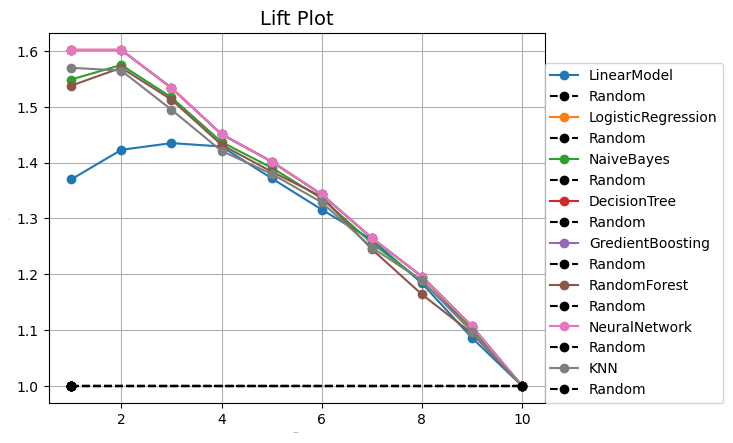

In [119]:
plot1=myplot_lift(y_test,pred1,label='LinearModel')
plot2=myplot_lift(y_test,pred2,label='LogisticRegression')
plot3=myplot_lift(y_test,pred3,label='NaiveBayes')
plot4=myplot_lift(y_test,pred4,label='DecisionTree')
plot5=myplot_lift(y_test,pred5,label='GredientBoosting')
plot6=myplot_lift(y_test,pred6,label='RandomForest')
plot7=myplot_lift(y_test,pred7,label='NeuralNetwork')
plot8=myplot_lift(y_test,pred8,label='KNN')

 For contacting 10% of obsearvations, using no model we should get 10% of labeling and using the given model we should get 16% of correct result. The y-value of the lift curve at 10% is 16 / 10 = 3.


In [120]:
def myplot_cumulative_gain(y_true, y_prob, label, title='Cumulative Gain Plot',
                         title_fontsize=14, text_fontsize=1, figsize=None):
    """Generates the cumulative Gain Plot from labels and probabilities
    The cumulative gains chart is used to determine the effectiveness of a
    binary classifier. A detailed explanation can be found at
    http://www2.cs.uregina.ca/~dbd/cs831/notes/lift_chart/lift_chart.html 
    The implementation here works only for binary classification.
    
    Args:
        y_true (array-like, shape (n_samples)):
            Ground truth (correct) target values.
        y_prob (array-like, shape (n_samples, n_classes)):
            Prediction probabilities for each class returned by a classifier.
        title (string, optional): Title of the generated plot. Defaults to
            "Decile-wise Lift Plot".
        title_fontsize (string or int, optional): Matplotlib-style fontsizes.
            Use e.g. "small", "medium", "large" or integer-values (8, 10, 12, etc.)
            Defaults to 14.
        text_fontsize (string or int, optional): Matplotlib-style fontsizes.
            Use e.g. "small", "medium", "large" or integer-values (8, 10, 12, etc.)
            Defaults to 10.
        figsize (2-tuple, optional): Tuple denoting figure size of the plot
            e.g. (6, 6). Defaults to ``None``.
    Returns:
        None
    Example:
        >>> import kds
        >>> from sklearn.datasets import load_iris
        >>> from sklearn.model_selection import train_test_split
        >>> from sklearn import tree
        >>> X, y = load_iris(return_X_y=True)
        >>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=3)
        >>> clf = tree.DecisionTreeClassifier(max_depth=1,random_state=3)
        >>> clf = clf.fit(X_train, y_train)
        >>> y_prob = clf.predict_proba(X_test)
        >>> kds.metrics.plot_cumulative_gain(y_test, y_prob[:,1])
    """

    # Cumulative Gains Plot
    # plt.subplot(2, 2, 3)
    pcg = decile_table(y_true,y_prob,labels=False)
    plt.plot(np.append(0, pcg.decile.values), np.append(0, pcg.cum_resp_pct.values), marker='o', label=label)
    #plt.plot(np.append(0, pcg.decile.values), np.append(0, pcg.cum_resp_pct_wiz.values), 'c--', label='Wizard')
    # plt.plot(list(np.arange(1,11)), np.ones(10), 'k--',marker='o')
    plt.plot([0, 10], [0, 100], 'k--', marker='o', label='Random')
    plt.title(title, fontsize=title_fontsize)
    plt.xlabel('Deciles', fontsize=text_fontsize)
    plt.ylabel('% Resonders', fontsize=text_fontsize)
    plt.legend(bbox_to_anchor=(1, 0), loc=3, borderaxespad=0)
    plt.grid(True)
    # plt.show()

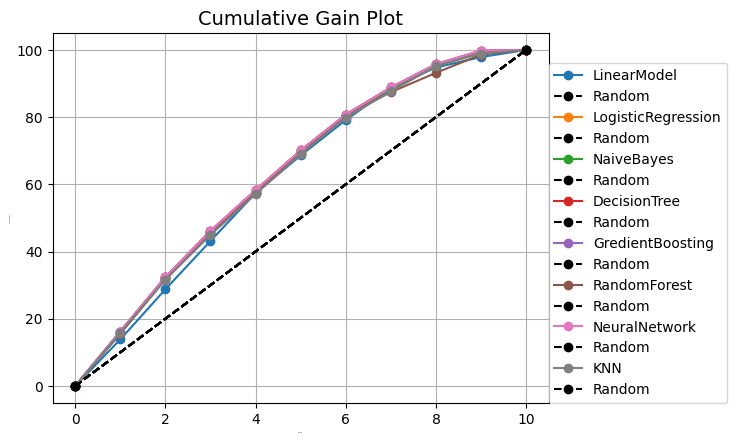

In [121]:
gaintable1=myplot_cumulative_gain(y_test,pred1,label="LinearModel")
gaintable2=myplot_cumulative_gain(y_test,pred2,label="LogisticRegression")
gaintable3=myplot_cumulative_gain(y_test,pred3,label="NaiveBayes")
gaintable4=myplot_cumulative_gain(y_test,pred4,label="DecisionTree")
gaintable5=myplot_cumulative_gain(y_test,pred5,label="GredientBoosting")
gaintable6=myplot_cumulative_gain(y_test,pred6,label="RandomForest")
gaintable7=myplot_cumulative_gain(y_test,pred7,label="NeuralNetwork")
gaintable8=myplot_cumulative_gain(y_test,pred8,label="KNN")



#FLASK


In [122]:
from flask import Flask

In [124]:
app = Flask(__name__)

@app.route("/")
def hello_world():
    return "<p>Hello, World!</p>"